In [171]:
#En este ejemplo nuestro Data Set lo cargaremos directamente desde la librería de Python SKLearn. 
#Es un DS de 506 filas x 13 columnas/variables features que contienen información de propiedades de Boston 
#(más específicamente Casas). 

#A partir de algunas de nuestras variables features intentaremos predecir el valor de los precios de las casas 
#(osea que nuestra variable a predecir “y” serà la variable MEDV) utilizando RLMcon 3 variables 
#y analizaremos los resultados: ver si se llegó o no a una buena predicción. 

#Aplicaremos RLM, Regresión de Ridge y Regresión de Lasso para evaluar nuestro modelo y obtener distintos rendimientos
# a modo de ejemplo.

#### 1-Importamos las librerias y cargamos nuestro DS.

In [172]:
import pandas as pd
import numpy as np
import sklearn 
import requests
from bs4 import BeautifulSoup
#LIbrerias de visualizacion:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#Para regresiòn lineal:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


In [173]:
#Carga de DS:
from sklearn import datasets
boston = datasets.load_boston()

In [174]:
type(boston)  #Tipo "Bunch" un Container de objetos que expone keys como atributos.

sklearn.utils.Bunch

In [175]:
from sklearn.utils import Bunch

In [176]:
#Analizamos el DS:
boston.keys()    #Imprimimos las keys

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [177]:
#De esta manera tenemos:
#data: contiene la info de varias casas (este sería nuestro DF a analizar)
#target:  precios de las casas (sería nuestra variable target/a predecir, "y")
#feature_names: nombres de nuestras features (sería el nombre de nuestras variables predictoras, "x")
#DESCR: descripción del DS

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### 2-Creamos el DF con Pandas:

In [178]:
VectorDataBoston = boston['data'] #DF para la data (filas).
VectorHeadersBoston = boston['feature_names'] #DF para los features.

In [179]:
VectorDataBoston

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [180]:
VectorDataBoston.shape #506 filas y 13 features/columnas.

(506, 13)

In [181]:
VectorHeadersBoston

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [182]:
DFBoston=pd.DataFrame(data=VectorDataBoston, columns=VectorHeadersBoston) #Definimos el DF.
DFBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### 3-Entendiento la variable target a predecir:

In [183]:
ValoresTarget=boston['target'] #Nuestra variable MEDV. 
ValoresTarget.shape #Son todos los valores para MEDV (506)

(506,)

In [184]:
DFBoston['MEDV']=boston['target'] #Agregamos como columna de nuestro DF a dicha variable.

In [185]:
#Movemos la variable target al frente de la tabla:
Y = DFBoston.MEDV.copy()
del DFBoston['MEDV']
DFBoston = pd.concat((Y,DFBoston), axis=1)
DFBoston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### 4-Limpieza y procesamiento de data:

In [186]:
DFBoston.dtypes #Analizamos los tipos de datos, vemos que son todas variables numéricas / continuas.

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [187]:
DFBoston.isnull().sum() #Luego de cargar la data una buena practica es observar si
                        #hay valores perdidos o nulos (NaN) en nuestra data. Contamos el valor de nulos para cada feature.
                        #Pero vemos que no tenemos ningún NaN, entonces no hacemos nada, es correcto.

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

#### 5-Realizamos una exploración y analisis estadístico de nuestros datos:

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


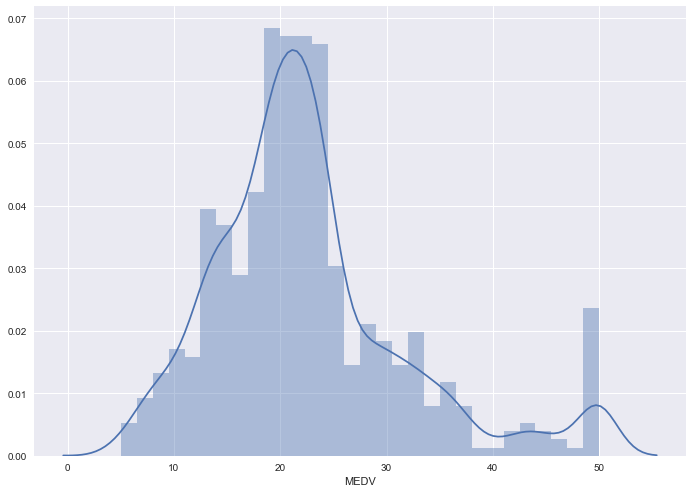

In [188]:
#El analisis exploratorio de data es muy importante antes de realizar el modelo de entranamiento.
#En esta sección usaremos visualizaciones para entender la relación de la variable target con las demás variables feature.

#Primero vamos a plotear la variable MEDV mediante distplot de la librería seabord:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(DFBoston['MEDV'], bins=30)
plt.show()

In [189]:
#En el gráfico de MEDV vemos que tiene una distribución normal (aproximada).

#Ahora eliminamos 4 features que no nos parecen de tanta importancia para predecir MEDV:
#(igualmente lo recomendable es analizar las relación entre las variables y ver que variable en función de cual
#sigue una relación lineal: mediante histograma,s y eliminar las que no siguen este tipo de relación lineal)
#Y luego verificariamos esto con la matriz de correlación observando los coeficientes de Pearson.  
for col in ['ZN','NOX', 'PTRATIO', 'B']:
    del DFBoston[col]

#Otra forma de asignar solo las columnas que queremos a un nuevo DF:
    #cols=['RM','AGE','TAX','LSTAT','MEDV']
    #NewDFBoston=DFBoston[cols]
    #NewDFBoston.head()

In [190]:
DFBoston.head() #Printeamos el DF con estas features eliminadas.

,MEDV,CRIM,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,LSTAT
0,24.0,0.00632,2.31,0.0,6.575,65.2,4.0900,1.0,296.0,4.98
1,21.6,0.02731,7.07,0.0,6.421,78.9,4.9671,2.0,242.0,9.14
2,34.7,0.02729,7.07,0.0,7.185,61.1,4.9671,2.0,242.0,4.03
3,33.4,0.03237,2.18,0.0,6.998,45.8,6.0622,3.0,222.0,2.94
4,36.2,0.06905,2.18,0.0,7.147,54.2,6.0622,3.0,222.0,5.33


In [191]:
#Vemos datos estadistitocs de las variables:
DFBoston.describe()  #Media, min, max.
#DFBoston.describe().T --> es para trasponer la matriz y poner columnas en filas y filas en columnas. 
#Observamos que la media de los precios es de 22,5 mil dólares (variable target MEDV)
#La propiedad más barata cuesta 5 mil dólares y la más cara 50 mil dólares.

,MEDV,CRIM,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.136779,0.069170,6.284634,68.574901,3.795043,9.549407,408.237154,12.653063
std,9.197104,8.596783,6.860353,0.253994,0.702617,28.148861,2.105710,8.707259,168.537116,7.141062
min,5.000000,0.006320,0.460000,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,1.730000
25%,17.025000,0.082045,5.190000,0.000000,5.885500,45.025000,2.100175,4.000000,279.000000,6.950000
50%,21.200000,0.256510,9.690000,0.000000,6.208500,77.500000,3.207450,5.000000,330.000000,11.360000
75%,25.000000,3.647423,18.100000,0.000000,6.623500,94.075000,5.188425,24.000000,666.000000,16.955000
max,50.000000,88.976200,27.740000,1.000000,8.780000,100.000000,12.126500,24.000000,711.000000,37.970000


In [192]:
#Ahora analizamos la matriz de correlación para ver el coeficiente de Pearson / correlación entre las variables
#y de esta manera ver si es posible utilizar un algoritmo de RL para las predicciones. 
DFBoston.corr(method='pearson')

,MEDV,CRIM,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,LSTAT
MEDV,1.000000,-0.385832,-0.483725,0.175260,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.737663
CRIM,-0.385832,1.000000,0.404471,-0.055295,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.452220
INDUS,-0.483725,0.404471,1.000000,0.062938,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.603800
CHAS,0.175260,-0.055295,0.062938,1.000000,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.053929
RM,0.695360,-0.219940,-0.391676,0.091251,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.613808
AGE,-0.376955,0.350784,0.644779,0.086518,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.602339
DIS,0.249929,-0.377904,-0.708027,-0.099176,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.496996
RAD,-0.381626,0.622029,0.595129,-0.007368,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.488676
TAX,-0.468536,0.579564,0.720760,-0.035587,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.543993
LSTAT,-0.737663,0.452220,0.603800,-0.053929,-0.613808,0.602339,-0.496996,0.488676,0.543993,1.000000


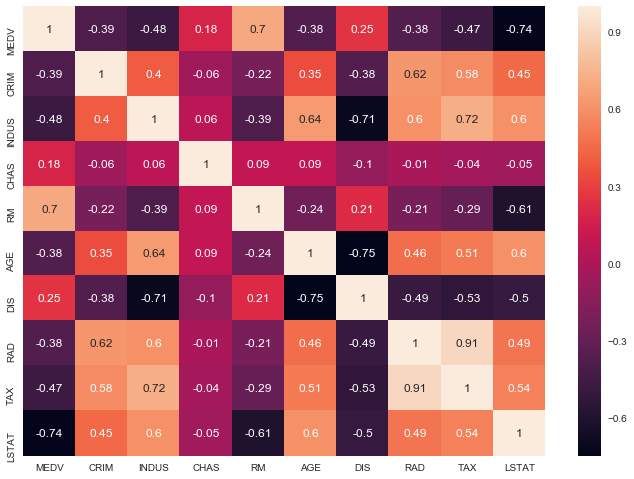

In [193]:
#Para verlo mejor más gráficamente, visualizamos esta misma matriz en forma de gráfico de "Mapa de Calor":
#Donde el violeta más oscuro representa un mayor coeficiente de Pearson NEGATIVO.
#Y donde el naranja más claro representa un mayor coeficiente de Pearson POSITIVO.

correlation_matrix = DFBoston.corr(method='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True) #funcion heatmap de la libreria seaborn.
#Otro parametro que le puedo agregar a la funcion heatmap (para hacer todo de un mismo color): cmap=sns.cubehelix_palette(50, light=0.95,dark=0.15))

plt.savefig('Figures/HeatMapHoustonHousing.png',   #Guardamos esta imagen.
           bbox_inches='tight', dpi=300)

#Observamos en la columna (o fila) MEDV (nuestra variable a predecir) los valores para las relaciones con las demás features...
#Y vemos que tiene una corelación lineal positiva "alta" con RM (de 0,7) y una correlación lineal negativa "alta" con LSTAT (de -0,74).

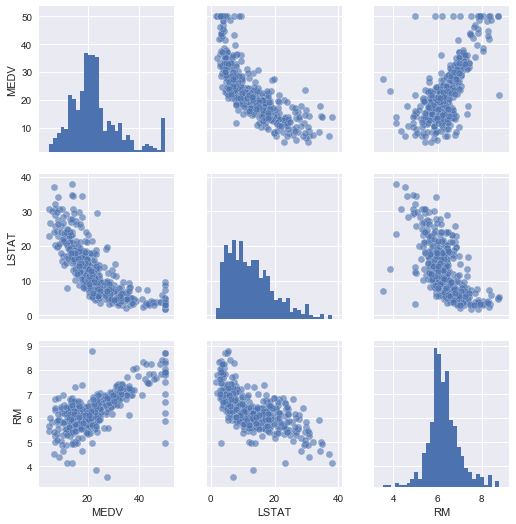

In [194]:
#Verificamos este factor de correlación viendo los histogramas para las relaciones entre MEDV, LSTAT y RM.
#y verificar que la matriz dé valores correctos y los gráficos se parescan a "algo lineal"):

#Creamos un nuevo DM solo para mostrar la relación entre estas 3 variables:
cols=['MEDV','LSTAT','RM']
DFMuestra=DFBoston[cols]

sns.pairplot(DFMuestra, 
             plot_kws={'alpha':0.6}, #Solo para visualizar mejor el gráfico. 
             diag_kws={'bins':30})   #Solo para visualizar mejor el gráfico. 

#Y observamos que, como marca la matriz anterior, hay una relación levemente lieneal POSITIVA entre RM y MEDV.
#Y tambien vemos que hay una relación levemente lineal NEGATIVA entre MEDV y LSTAT.

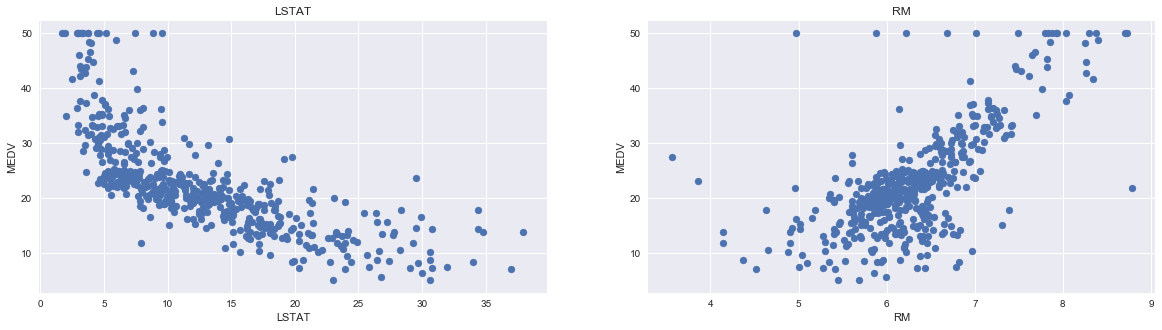

In [195]:
#Ahora si, realizaremos un analisis predictivo mediante un modelo de REgresiòn Lineal.
#Como vimos anteriormente utilizaremos las variables / features RM y LSTAT
#(que tienen una relación "lineal" / mayor correlación con MEDV, nuestra variable target).
#Ya que para entrenar nuestro modelo de RL necesitamos feautures que tengan alta correlación con MEDV.

#Para seleccionar las variables feature para un modelo de RLM debemos tener en cuenta tambien la MULTICOLINEALIDAD. 
#La multicolinealidad hace referencia a la correlación lineal entre mis variables predictoras (en este caso LSTAT y RM).
#Si existe una relación lineal fuerte / un factor de correlación grande entre nuestras variables predictoras, nuestro
#modelo seguramente predecirá mal. 
#Pero, para nuestro caso NO se cumple esto, ya que tienen un factor de correlación de -0,61 (no es muy alto). De esta manera
#NO nos afectará la MULTICOLINEALIDAD.
#Distinto hubiera sido si hubiesemos visto que MEDV tiene una correlación grande con RAD y TAX. Ya que ahi si, como 
#TAX y RAD entre si estan fuertemente correlacionados (factor de 0,91) nos afectaría la MULTICOLINEALIDAD. Tambien ocurriría
#lo mismo para DIG y AGE (correlación de -0,75).

#VER ESTO PARA ENTENDER LA MULTICOLINEALIDAD. --> https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r/1150#1150

#Primero graficamos LSTAT y RM en función de MEDV (los mismos gráficos que hicimos arriba, pero solo 2, para mayor claridad)

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = DFBoston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = DFBoston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

#De esta manera tenemos MEDV(LSTAT) y MEDV(RM) --> 1er y 2do gráfico. 

In [196]:
#Observaciones:
    #Podemos ver que los valores de RM incrementan linealmente (a mayor RM, mayor es MEDV)
    #Y además, podemos ver que los precios tienden a decrementar cuando LSTAT incrementa. 

##### 6-Regresión Lineal Múltiple. 

In [197]:
# Primero preparamos la data para usar RLM:

#Concatenamos las columnas LSTAT y RM usando np.c_ (de la libreria numpy):
X = pd.DataFrame(np.c_[DFBoston['LSTAT'], DFBoston['RM']], columns = ['LSTAT','RM'])
Y = DFBoston['MEDV']

In [198]:
#Ahora partimos la data en sets de entrenamiento y de test.
#Entrenaremos nuestro modelo con un 80% de ejemplos; y luego lo testearemos con el resto 20%.
#Esto lo hacemos PARA EVALUAR EL RENDIMIENTO DEL MODELO EN DATOS NO VISTOS.
#Para hacer esta partición usamos la función de scikit-learn "train_test_split".

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

#Luego imprimimos los tamaños de nuestro set de train y test para veritificar que se partieron los datos correctamente:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 2)
(102, 2)
(404,)
(102,)


In [199]:
#Ahora entrenamos a nuestro modelo con el set de entrenamiento obviamente (mediante la función LinearRegression de scickit-learn):
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [200]:
#Ahora evaluamos nuestro modelo... hacemos predicciones en base a nuestros set de PRUEBAS (TESTs):
y_predict = lin_model.predict(X_test)
MSE = mean_squared_error(Y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(Y_test, y_predict)))
r2 = r2_score(Y_test, y_predict)


#El  %.2f' % es para dejar solo 2 decimales. 
print("Performance del modelo:")
print('MSE:  %.2f' % MSE ) # Error Cuadrado Medio
print('RMSE es: %.2f' % rmse) # Este es el valor donde corta el eje Y (en X=0)
print('R2 score es: %.2f' % r2) # Este es el valor donde corta el eje Y (en X=0)


Performance del modelo:
MSE:  26.39
RMSE es: 5.14
R2 score es: 0.66


In [201]:
lin_model.coef_

array([-0.71722954,  4.58938833])

In [ ]:
#Estos valores que nos dieron NO son los mejores, pero es un buen camino. 

##### 7-Regresión Ridge y Lasso:

In [168]:
#Como sabemos, Ridge y Lasso son técnicas de regularización que nos permiten mejorar la performance del modelo por ej. cuando
#tenemos multicolinealidad (en nuestro caso no sucede esto: LSTAT y RM NO lo son), 
#pero igualmente lo implementamos y comparamos ambas regresiones para ver a qué valores llegamos.  

# Nuevamente preparamos la data para usar RLM - R Ridge y R Lasso:
X = pd.DataFrame(np.c_[DFBoston['LSTAT'], DFBoston['RM']], columns = ['LSTAT','RM'])
Y = DFBoston['MEDV']
#Nuevamente partimos la data en sets de entrenamiento y de test:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

#Anteriormente hicimos esto para que Python modele la Regresión Lineal: (usó el método de minimos cuadrados)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train         #entrenamos el modelo.

#De esta manera le decimos a Python que envés del método de minimos cuadrados utilice Ridge:
lin_model_ridge = Ridge(alpha=0.5)
lin_model_ridge.fit(X_train, Y_train)  #entrenamos el modelo. 

#Y así le decimos que utilice Lasso:
# Create ridge regression with an alpha value
lin_model_lasso = Lasso(alpha=0.1) 
lin_model_lasso.fit(X_train, Y_train)  #entrenamos el modelo.

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [203]:
lin_model_ridge.coef_

array([-0.71822299,  4.57171055])

In [202]:
#Ahora evaluamos nuestros modelos (hacemos predicciones en base a nuestros set de PRUEBAS (TESTs)) para los 3 casos:

#Con Métodos de mínimos cuadrados (lo que hice anteriormente:)
y_predict_1 = lin_model.predict(X_test)
MSE_1 = mean_squared_error(Y_test, y_predict_1)
rmse_1 = (np.sqrt(mean_squared_error(Y_test, y_predict_1)))
r2_1 = r2_score(Y_test, y_predict_1)

#Con Ridge:
y_predict_2 = lin_model_ridge.predict(X_test)
MSE_2 = mean_squared_error(Y_test, y_predict_2)
rmse_2 = (np.sqrt(mean_squared_error(Y_test, y_predict_2)))
r2_2 = r2_score(Y_test, y_predict_2)

#Con Lasso:
y_predict_3 = lin_model_lasso.predict(X_test)
MSE_3 = mean_squared_error(Y_test, y_predict_3)
rmse_3 = (np.sqrt(mean_squared_error(Y_test, y_predict_3)))
r2_3 = r2_score(Y_test, y_predict_3)

#Imprimimos los resultados: 
print("Performance del modelo Método de mínimos cuadrados:")
print('MSE:  %.3f' % MSE_1 ) # Error Cuadrado Medio
print('RMSE es: %.3f' % rmse_1) # Este es el valor donde corta el eje Y (en X=0)
print('R2 score es: %.3f' % r2_1) # Este es el valor donde corta el eje Y (en X=0)

print("Performance del modelo Método de Ridge:")
print('MSE:  %.3f' % MSE_2 ) # Error Cuadrado Medio
print('RMSE es: %.3f' % rmse_2) # Este es el valor donde corta el eje Y (en X=0)
print('R2 score es: %.3f' % r2_2) # Este es el valor donde corta el eje Y (en X=0)

print("Performance del modelo Método de Lasso:")
print('MSE:  %.3f' % MSE_3 ) # Error Cuadrado Medio
print('RMSE es: %.3f' % rmse_3) # Este es el valor donde corta el eje Y (en X=0)
print('R2 score es: %.3f' % r2_3) # Este es el valor donde corta el eje Y (en X=0)


Performance del modelo Método de mínimos cuadrados:
MSE:  26.393
RMSE es: 5.137
R2 score es: 0.663
Performance del modelo Método de Ridge:
MSE:  26.419
RMSE es: 5.140
R2 score es: 0.663
Performance del modelo Método de Lasso:
MSE:  26.810
RMSE es: 5.178
R2 score es: 0.658


In [ ]:
#Conclusión:
    #Los métodos de Ridge y Lasso nos dieron prácticamente lo mismo que aplicando método de mínimos cuadrados, con
    #lo cual aplicar un método u otro es lo mismo en nuestor caso.
    #Se debería provar mediante el método de "Cross Validation" para elegir un ALFA apropiado, ya que enteriormente elegimos 
    #2 alfas "al azar": 0.5 para Ridge y 0.1 para Lasso. 